# Computational Methods in Economics

## Lecture 7 - Numerical Integration

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-01-27 14:41:48.745465


### Preliminaries

#### Import Modules

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import scipy.integrate

## This Lecture

- [Introduction](#introduction)
- [Newton-Coates Methods](#newton)
- [Gaussian Quadrature](#gauss)

--------------------------------------------------------------------------------------------------------------------------------
<a id = "introduction"></a>

### Introduction

Suppose you need to evaluate the integral 

\begin{equation}
    \int_I f(\mathbf{x}) w(\mathbf{x}) d\mathbf{x},\quad \mathbf{x} \in I \subset \mathbb{R}^n
\end{equation}

For simplicity, we will focus on univariate functions:

\begin{equation}
    \int_a^b f(x) w(x) dx, \quad x \in [a, b] \subset \mathbb{R}
\end{equation}

The goal of numerical integration is to *approximate* the integral of a real-valued function $f$ over an interval $[a, b]$ with respect to a *weighting function* $w$.

In many applications, the weighting function is just the identity, $w(x) = 1$. 

In other cases, we can interpret the integral as the *expected value* of a continuous random variable, with $w(x)$ being interpreted as the probability density function:

\begin{equation}
    E[f(x)] = \int f(x)\ pdf(x) dx
\end{equation}



In all methods considered below, the integral is approximated by a weighted sum of function values:

\begin{equation}
    \int_a^b f(x) w(x) dx \approx \sum_{i = 1}^n \omega_i f(x_i)
\end{equation}

where $\omega_i$ are the *(quadrature) weights* and $x_i$ are the *(quadrature) nodes*.

We consider two types of methods, which are distinguished by the way they determine these weights and nodes:

1. Newton-Coates methods: the trapezoid rule and Simpson's rule;
2. Gaussian quadrature: Gauss-Legendre and Gauss-Hermite.

A third common method of conducting numerical integration is *Monte-Carlo integration*, which we will skip in the interest of time (but compare Miranda & Fackler, section 5.3).

--------------------------------------------------------------------------------------------------------------------------------
<a id = "newton"></a>

### Newton-Coates Methods

In the terminology introduced above, Newton-Coates methods have in common that the nodes $x_i$ are chosen arbitrarily in the interval $[a, b]$ (usually equally spaced). 

Moreover, the weights $\omega_i$ are chosen so that if $f$ is locally a low-degree polynomial, the numerical integration formula above is "correct" in the sense that it computes the exact integral.

In the following, we assume that we approximate the interval over $n + 1$ equally spaced nodes. Hence, we divide the interval $[a, b]$ in $n$ "sub-interval" of equal length $h$, i.e.

\begin{equation}
    h = x_{i + 1} - x_i,\quad \forall i = 1, ..., n
\end{equation}

What does that mean in practice? Start with the *trapezoid rule*. It approximates the function $f$ between two points $x_i$ and $x_{i+1}$ by a linear function. Hence, the resulting integral is a trapezoid.  

\begin{equation}
\begin{split}
    \int_{x_{i}}^{x_{i+1}} f(x) dx &\approx f(x_i) (x_{i+1} - x_{i}) + \frac{1}{2} (x_{i+1} - x_{i}) (f(x_{i+1}) - f(x_i))  \\
    &= \frac{h}{2}[f(x_{i}) + f(x_{i+1})]
\end{split}
\end{equation}

To approximate the integral over the whole interval $[a, b]$, we can use the *composite rule* and add up the approximations over the $n$ sub-intervals $[x_i, x_{i+1}]$:

\begin{equation}
    \int_{a}^{b} f(x) dx \approx \frac{h}{2} \sum_{i = 1}^n   [f(x_{i}) + f(x_{i+1})] = \sum_{i = 1}^{n + 1} \omega_i  f(x_{i}) 
\end{equation}

where 

\begin{equation}
    \omega_i  = \left\{ \begin{array}{l}
    \frac{h}{2}\quad \text{for}\ i = 1, n + 1 \\
    h\quad \text{otherwise}
    \end{array}\right.
\end{equation}

It is easy to see that the trapezoid rule gives the precise integral when $f$ is a first-degree polynomial, i.e. a linear function.

Analogous, *Simpson's rule* uses (piecewise) quadratic approximations to the integrand $f$. It is correct if $f$ is a third-degree (cubic) polynomial.

Simpson's rule approximates $f$ between two points $x_i$ and $x_{i+1}$ in the following way:

\begin{equation}
    \int_{x_{i}}^{x_{i+1}} f(x) dx \approx  \frac{x_{i+1} - x_{i}}{6} \left[f(x_{i+1}) + 4f\left(\frac{x_{i+1} + x_{i}}{2}\right) + f(x_i)\right] =  \frac{h}{6} \left[f(x_{i+1}) + 4f\left(\frac{x_{i+1} + x_{i}}{2}\right) + f(x_i)\right] 
\end{equation}

We will skip the derivation of this expression, but just take it as given.

It is more convenient to consider three grid points, $x_i, x_{i + 1}, x_{i + 2}$. Then, 

\begin{equation}
    \int_{x_{i}}^{x_{i+2}} f(x) dx \approx  \frac{x_{i+2} - x_{i}}{6} \left[f(x_{i+2}) + 4f\left(x_{i + 1}\right) + f(x_i)\right] =  \frac{h}{3} \left[f(x_{i+1}) + 4f\left(x_{i + 1}\right) + f(x_i)\right] 
\end{equation}

For the integral over the whole interval $[a, b]$, we would again add up the approximations over the sub-intervals $[x_i, x_{i + 2}]$:

\begin{equation}
    \int_{a}^{b} f(x) dx \approx \frac{h}{3} \left[f(x_1) + 4f(x_2) + 2f(x_3) + ... + 2f(x_{n}) + f(x_{n +1}) \right] = \sum_{i = 0}^{n +1} \omega_i  f(x_{i}) 
\end{equation}

where 

\begin{equation}
    \omega_i  = \left\{ \begin{array}{l}
    \frac{h}{3}\quad \text{for}\ i = 1, n+1 \\
    \frac{4h}{3}\quad \text{otherwise for}\ i\ \text{odd}\\
    \frac{2h}{3}\quad \text{otherwise for}\ i\ \text{even}
    \end{array} \right.
\end{equation}

Note that we have implicitly assumed that the number of intervals, $n$, is even. 

In general, Simpson's rule should be used over the trapezoid rule (and is used most commonly in practice), since it will yield more accurate approximations for smooth functions, without being more computationally complex.

In Python, we can use the **scipy.integrate** package, containing functions **trapz** for the trapezoid rule and **simps** for Simpson's rule. 

By default, these functions assume evenly spaced nodes, and hence the only mandatory inputs is an array of function values (rather than the function itself!). You can change the spacing (by default 1) by using the **dx** keyword. 

For example, integrate the function $x^2$ over the interval $[0, 3]$, using four nodes. The true value for the interval is 9 (verify this!). As expected, Simpson's rule gets closer to the true value than the trapezoid rule 

In [3]:
print( scipy.integrate.trapz([0, 1, 4, 9]) )

9.5


In [4]:
scipy.integrate.simps([0, 1, 4, 9])

9.166666666666666

--------------------------------------------------------------------------------------------------------------------------------
<a id = "gauss"></a>

### Gaussian Quadrature

Newton-Coates methods work for arbitrary nodes $x_i$. In contrast, Gaussian quadrature are constructed by efficient choices of *both* the nodes and the weights. 

The general idea of Gaussian quadrature is to find $n$ nodes $\xi_i$ and $n$ weights $\omega_i$, $ i = 1, ..., n$, such that

\begin{equation}
    \int_a^b w(x) p_{2n-1}(x) dx \stackrel{!}{=} \sum_{i = 1}^n \omega_i f(\xi_i)
\end{equation}

where $p$ belongs to a family of polynomials of degree $2n -1 $, and $w(x)$ is a nonnegative weighting function. Note that we have an equality here, rather than an approximation.

Once the nodes and weights have been obtained, we can approximate the function $f(x)$ in the usual way:

\begin{equation}
    \int_a^b w(x) f(x) dx \approx \sum_{i = 0}^n \omega_i f(\xi_i)
\end{equation}

#### Gauss-Legendre Quadrature

For concreteness, start with *Gauss-Legendre quadrature*. As Newton-Coates methods, they also work for integrals where $w(x) = 1$.

We can find the weights $w_i$ and nodes $\xi_i$ as the solutions to following system of non-linear equations:

\begin{equation}
\int_{-1}^{1} x^j dx = \sum_{i = 1}^{n} \omega_i \xi_i^j,\ j = 0,...,2n - 1
\end{equation}

Note that we have $2n$ unknowns - $n$ nodes and $n$ weights - and hence we need $2n$ equations:
    
\begin{align}
\int_{-1}^{1} x^0 dx &= \sum_{i = 1}^{n} \omega_i \xi_i^0 \\
\int_{-1}^{1} x^1 dx &= \sum_{i = 1}^{n} \omega_i \xi_i^1 \\
\vdots \\
\int_{-1}^{1} x^{2n - 1} dx &= \sum_{i = 1}^{n} \omega_i \xi_i^{2n - 1}
\end{align}    

The integrals on the left hand side can be evaluated precisely, i.e. yield scalars. 

As you would expect, NumPy has a routine that yields the nodes and weights directly: **np.polynomial.legendre.leggauss**. It takes the number of nodes as input.

In [5]:
[nodes_l, weights_l] = np.polynomial.legendre.leggauss(8)
print( nodes_l )
print( weights_l )

[-0.96028986 -0.79666648 -0.52553241 -0.18343464  0.18343464  0.52553241
  0.79666648  0.96028986]
[0.10122854 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122854]


Note that these nodes and weights apply to integrals between -1 and 1. As with function approximation, we can make a change of variables to apply Gaussian-Legendre quadrature to general integrals:

\begin{equation}
    \int_a^b w(x) f(x) dx = \frac{b - a}{2} \sum_{i = 0}^n \omega_i f\left(a + \frac{(\xi_i + 1)(b - a)}{2} \right)
\end{equation}

Why should we use Gauss-Legendre quadrature over the Simpson's rule? First note that by construction, the Gaussian quadrature rule computes the exact integral when the function $f$ is a polynomial of degree $2n - 1$ (or less). 

In contrast, Simpson's rule is correct "only" for cubic polynomials.

Related to this, it can be shown that the approximation error when using Gaussian-Legendre decreases exponentially when increasing the number of nodes, and hence faster than for Newton-Coates methods (at least for smooth functions).

However, note that if $f$ has kinks (i.e., noncontinuous derivatives), Newton-Coates methods may be more efficient (cp. Miranda and Fackler, section 5.2).

##### Example: Expectation of a log-logistically distributed variable

In climate science (and climate economics), an important variable is the *climate sensitivity*. Essentially, it yields the (long-run) increase in atmospheric temperature if the carbon concentration in the atmosphere is doubled.

In a paper by Dietz and Stern (2015), the climate sensitivity $S$ is assumed to follow a log-logistic distribution, with pdf given by:

\begin{equation}
    f(S) = \frac{(a/b) (S/b)^{a-1}}{(1 + (S/b)^a)^2}
\end{equation}

Say we want to compute the expectation of $S$. It is given by:

\begin{equation}
    E(S) = \int_0^\infty S \frac{(a/b) (S/b)^{a-1}}{(1 + (S/b)^a)^2} dS = \frac{b \pi / a}{\sin(\pi/a)}
\end{equation}


Numerically, this expectation can be approximated in the following way. Setting $\bar{S}$ sufficently high, let

\begin{equation}
\begin{split}
    E(S) &\approx  \int_0^{\bar{S}} S \frac{(a/b) (S/b)^{a-1}}{(1 + (S/b)^a)^2} dS = \int_0^{\bar{S}} \phi(S) dS \\
         &= \frac{\bar{S}}{2} \sum_{i = 0}^n \omega_i \phi\left( \frac{(\xi_i + 1)\bar{S}}{2} \right)
\end{split}
\end{equation}

In [6]:
def pdf_loglog(x, a, b):
    """
    Gives the pdf of a log-logistically distributed random variable with shape parameter a and scale parameter b MULTIPLIED with the RV
    """
    return (a / b**(a-1)) * x**(a-1) * (b * (1 + (x/b)**a)**2)**(-1) * x

In [7]:
# Parameters
a = 4.2
b = 2.6

# True mean
m = b * np.pi / a * (np.sin(np.pi/a))**(-1)
print(m)

# approximate mean
[nodes_l, weights_l] = np.polynomial.legendre.leggauss(20)
sbar = 20
X = pdf_loglog( (nodes_l + 1) * sbar * 0.5 , a, b)
print(sbar/2 * weights_l @ X)

2.8592669835544857
2.855018866935114


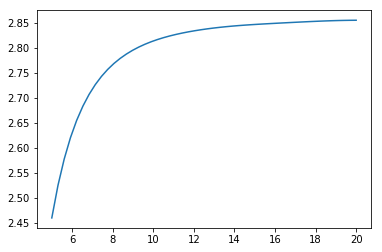

In [8]:
Sbar = np.linspace(5, 20 , 50)
M = np.zeros(50)
for (i, item) in enumerate(Sbar):
    X = pdf_loglog( (nodes_l + 1) * item * 0.5 , a, b)
    M[i] = item/2 * weights_l @ X
    
fig, ax = plt.subplots()
ax.plot(Sbar, M)

#### Gauss-Hermite Quadrature

Gauss-Hermite quadrature is very useful because *normally distributed* random variables are frequently used in economic problems. 

Gauss-Hermite quadrature is used to evaluate 

\begin{equation}
    \int_{-\infty}^{\infty} f(x) e^{-x^2} dx \approx \sum_{i = 1}^n \omega_i f(\xi_i)
\end{equation}

What is the connection to the normal distribution? Recall that the pdf of a normally distributed variable is 

\begin{equation}
    pdf(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{ \left(x - \mu\right)^2}{2\sigma^2}}
\end{equation}


Hence, if $X$ is a random variable with $X \sim N(\mu, \sigma^2)$, the expected value of $f(X)$ is given by


\begin{equation}
    E[f(X)] = \int_{-\infty}^{\infty} f(x)\ pdf(x) dx = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{\infty} f(x) \exp\left(-\frac{ \left(x - \mu\right)^2}{2\sigma^2}\right) dx
\end{equation}


This almost looks like an integral that can be approximated using Gauss-Hermite quadrature. As a last step, we need to use a linear change of variables. Define $y \equiv (x - \mu) / \sqrt{2} \sigma$, and hence

\begin{equation}
    \int_{-\infty}^{\infty} f(x) \exp\left(-\frac{ \left(x - \mu\right)^2}{2\sigma^2}\right) dx = \int_{-\infty}^{\infty} f\left(\sqrt{2} \sigma y + \mu\right) \exp\left(-y^2\right) \sqrt{2}\sigma\ dy
\end{equation}



Putting all this together, we get that

\begin{equation}
    E[f(X)] = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{\infty} f(x) \exp\left(-\frac{ \left(x - \mu\right)^2}{2\sigma^2}\right)\ dx \approx \frac{1}{\sqrt{\pi}} \sum_{i = 1}^n \omega_i f(\sqrt{2}\sigma \xi_i + \mu)
\end{equation}

where $\xi_i$ and $\omega_i$ are the Gauss-Hermite nodes and weights over $[-\infty, \infty]$.

In NumPy, the function **np.polynomial.hermite.hermgauss** yields these nodes and weights:

In [9]:
[nodes_h, weights_h] = np.polynomial.hermite.hermgauss(8)
print( nodes_h )
print( weights_h )

[-2.93063742 -1.98165676 -1.15719371 -0.38118699  0.38118699  1.15719371
  1.98165676  2.93063742]
[1.99604072e-04 1.70779830e-02 2.07802326e-01 6.61147013e-01
 6.61147013e-01 2.07802326e-01 1.70779830e-02 1.99604072e-04]


##### Example 1: Approximate the expected value of a random variable $X \sim N(2, 0.5)$

In [10]:
mu = 2
sig2 = 0.05
n = 8
[nodes, weights] = np.polynomial.hermite.hermgauss(n)
print( np.pi**(-0.5) * (np.sqrt(2 * sig2) * nodes + mu) @ weights)

2.0000000000000004


##### Example 2: Gauss-Hermite quadrature in the NGM

In the stochastic NGM, let output be given by $y_t = z_t f(k_t)$. $z_t$ is a random variable whose log follows an AR(1) process: 

\begin{equation}
    \ln(z_{t+1}) = \rho \ln(z_t) + \epsilon_{t+1},\ \ \epsilon_{t+1} \sim N(0, \sigma^2)
\end{equation}

Recall that in the deterministic NGM (where $z_t = 1$ in every period $t$) the Euler equation is given by 

\begin{equation}
    c_t^{-\nu} = c_{t+1}^{-\nu} (f_k(k_{t+1}, h_{t+1}) + 1 - \delta)
\end{equation}

(Compare for example lecture 4 and problem set 8). 

In the stochastic NGM, the random variable $\epsilon_{t+1}$ enters the on the right hand side, and hence there is an expected value:

\begin{equation}
\begin{split}
    c_t^{-\nu} &= E[c_{t+1}^{-\nu} (z_{t+1} f_k(k_{t+1}, h_{t+1}) + 1 - \delta)] \\
               &= E[c_{t+1}^{-\nu} \left(\exp(\rho \ln(z_t) + \epsilon_{t+1}) f_k(k_{t+1}, h_{t+1}) + 1 - \delta\right)]
\end{split}    
\end{equation}

In other words, current consumption depends on the expected value of the RHS of the Euler equation, which needs to be evaluated numerically.

Recall from above that if $\epsilon_{t+1}$ is normally distributed with mean $\mu$ and variance $\sigma^2$, the expectation of $g(\epsilon_{t+1})$ can be approximated by

\begin{equation}
    E[g(\epsilon_{t+1})] = \sum^n_{i = 1} \frac{1}{\sqrt{\pi}} \omega_i g(\sqrt{2} \sigma \xi_i + \mu)
\end{equation}

Hence, the right hand side of the Euler equation can be approximated in the following way:

\begin{equation}
\begin{split}
    E[g(\epsilon_{t+1})] &= E[c_{t+1}^{-\nu} ( \exp(\rho \ln(z_t) + \epsilon_{t+1}) f_k(k_{t+1}, h_{t+1}) + 1 - \delta)]  \\
                  &= E[c_{t+1}^{-\nu} (  z_t^\rho \exp(\epsilon_{t+1}) f_k(k_{t+1}, h_{t+1}) + 1 - \delta)] \\
                  &= \sum^n_{i = 1} \frac{1}{\sqrt{\pi}} \omega_i \big( c_{t+1}^{-\nu} (  z_t^\rho \exp(\sqrt{2} \sigma \xi_i) f_k(k_{t+1}, h_{t+1}) + 1 - \delta) \big)
\end{split}
\end{equation}




We will see in the next lecture why Gauss-Hermite quadrature is useful for solving the NGM.